___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA 

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef



plt.rcParams["figure.figsize"] = (7,4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
# so here we import read_csv to read our file 
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")

# and this is where I combine the datasets for men and women into dataframes.
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# we create a copy dataframe for manipulating 
df_copy = df.copy()

In [4]:
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  ...  \
0                         253               202                401  ...   
1                         245               193                394  ...   
2                         256               196                427  ...   
3                         262               199                401  ...   
4                         267               224                435  ...   
...                       ...               ...                ...  ...   
6063                      252               196                368  ...   
6064                      236               181                378  ...   
6065                      234               183                363  ...   
6066                      213               163                376  ...   
6067                      236               188                361  ...   

      PrimaryMOS  SubjectsBirthLocation  SubjectNumericRace  Ethnicity  \
0            19D           North Dakota                   1        NaN   
1            68W               New York                   1        NaN   
2            68W               New York                   2        NaN   
3            88M              Wisconsin                   1        NaN   
4            92G         North Carolina                   2        NaN   
...          ...                    ...                 ...        ...   
6063         42A                  Texas                   3    Mexican   
6064         25U                  Texas                   3    Mexican   
6065         42A                  Texas                   2        NaN   
6066         92Y                  Texas                   3    Mexican   
6067         92F                  Texas                   3    Mexican   

      DODRace  Age  Heightin  Weightlbs  WritingPreference  SubjectId  
0           1   41        71        180         Right hand        NaN  
1           1   35        68        160          Left hand        NaN  
2           2   42        68        205          Left hand        NaN  
3           1   31        66        175         Right hand        NaN  
4           2   21        77        213         Right hand        NaN  
...       ...  ...       ...        ...                ...        ...  
6063        3   51        67        180   

In [5]:
# so as we see the height and weight are repeated and we wana to Convert the unit to get a great insight 
df_copy.loc[:,["weightkg", "Weightlbs", "Heightin","stature"]]
df_copy["weightkg"] = df_copy["weightkg"]/10
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  ...  \
0                         253               202                401  ...   
1                         245               193                394  ...   
2                         256               196                427  ...   
3                         262               199                401  ...   
4                         267               224                435  ...   
...                       ...               ...                ...  ...   
6063                      252               196                368  ...   
6064                      236               181                378  ...   
6065                      234               183                363  ...   
6066                      213               163                376  ...   
6067                      236               188                361  ...   

      PrimaryMOS  SubjectsBirthLocation  SubjectNumericRace  Ethnicity  \
0            19D           North Dakota                   1        NaN   
1            68W               New York                   1        NaN   
2            68W               New York                   2        NaN   
3            88M              Wisconsin                   1        NaN   
4            92G         North Carolina                   2        NaN   
...          ...                    ...                 ...        ...   
6063         42A                  Texas                   3    Mexican   
6064         25U                  Texas                   3    Mexican   
6065         42A                  Texas                   2        NaN   
6066         92Y                  Texas                   3    Mexican   
6067         92F                  Texas                   3    Mexican   

      DODRace  Age  Heightin  Weightlbs  WritingPreference  SubjectId  
0           1   41        71        180         Right hand        NaN  
1           1   35        68        160          Left hand        NaN  
2           2   42        68        205          Left hand        NaN  
3           1   31        66        175         Right hand        NaN  
4           2   21        77        213         Right hand        NaN  
...       ...  ...       ...        ...                ...        ...  
6063        3   51        67        180   

## Explore Data

In [6]:
# we use describe method to demonstrate the computing statistical analysis
df_copy.describe()

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
count 6068.000   4082.000                        6068.000        6068.000   
mean  1697.499  20003.371                         246.469        1406.161   
std   1133.004   6568.435                          37.400          79.091   
min      0.000  10027.000                         155.000        1115.000   
25%    758.000  14270.250                         219.000        1350.000   
50%   1516.500  17236.500                         242.000        1410.000   
75%   2564.250  27315.750                         271.000        1462.000   
max   4081.000  29452.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               6068.000            6068.000      6068.000   
mean                 327.374             224.891      1299.609   
std                   20.720              16.052        72.022   
min                  249.000             156.000      1038.000   
25%                  313.000             214.000      1249.000   
50%                  328.000             225.000      1302.000   
75%                  341.250             235.000      1349.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  ...  \
count                 6068.000          6068.000           6068.000  ...   
mean                   244.193           194.755            399.204  ...   
std                     16.845            13.516             30.237  ...   
min                    186.000           151.000            283.000  ...   
25%                    232.000           185.000            376.000  ...   
50%                    245.000           195.000            404.000  ...   
75%                    256.000           204.000            421.000  ...   
max                    306.000           245.000            489.000  ...   

       waistheightomphalion  weightkg  wristcircumference  wristheight  \
count              6068.000  6068.000            6068.000     6068.000   
mean               1031.501    79.709             169.003      830.060   
std                  62.702    15.653              13.125       47.651   
min                 805.000    35.800             124.000      672.000   
25%                 988.000    68.200             159.000      797.000   
50%                1033.000    78.500             170.000      830.000   
75%                1076.000    89.600             179.000      863.000   
max                1245.000   144.200             216.000     1009.000   

       SubjectNumericRace  DODRace      Age  Heightin  Weightlbs  SubjectId  
count            6068.000 6068.000 6068.000  6068.000   6068.000   1986.000  
mean               17.515    1.615   29.761    68.257    174.750  22306.606  
std               550.950    0.979    8.675     3.862     33.692  20904.730  
min                 1.000    1.000   17.000    56.000      0.000  10037.000  
25%                 1.000    1.000   23.000    66.000    150.000  17667.000  
50%                 1.000    1.000   28.000    68.000    173.000  22096.500  
75%                 2.000    2.000   36.000    71.000    196.000  26089.750  
max             42351.000    8.000   58.000    94.000    321.000 920103.000  

[8 rows x 101 columns]

In [7]:
df_copy.describe(include="O")

Gender       Date Installation     Component                  Branch  \
count    6068       6068         6068          6068                    6068   
unique      2        253           12             3                       3   
top      Male  27-Feb-12  Camp Shelby  Regular Army  Combat Service Support   
freq     4082         45         1160          3140                    3174   

       PrimaryMOS SubjectsBirthLocation Ethnicity WritingPreference  
count        6068                  6068      1421              6068  
unique        285                   152       209                 3  
top           11B            California   Mexican        Right hand  
freq          671                   446       357              5350

In [8]:
df_copy['WritingPreference'].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [9]:
df_copy['SubjectsBirthLocation']

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [10]:
# so after i investigated the data in deapth I choose the feature that I want to remove, such as Ethnicity because more than 50% of them are missing 
# SubjectNumericRace It might confuse us since it's similar to the target
# PrimaryMOS because they possess numerous unique values and I dropped the ID number as it served no purpose also Weightlbs, Heightin, and so forth.
df_copy = df_copy.drop(["Ethnicity", "PrimaryMOS", "SubjectNumericRace" ,"Weightlbs", "Heightin", 
                        "Installation", "subjectid", "SubjectId", "Date", "Branch", "Component", "index"], axis=1)



In [11]:
df_copy

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  ...  waistfrontlengthsitting  waistheightomphalion  \
0                  274  ...                      440                  1054   
1                  257  ...                      371                  1054   
2                  261  ...                      411                  1041   
3                  262  ...                      399                   968   
4                  263  ...                      379                  1245   
...                ...  ...                      ...                   ...   
6063               312  ...                      370                  1002   
6064               287  ...                      374                   958   
6065               299  ...                      351                   970   
6066               280  ...                      335                   952   
6067               279  ...                      394                   943   

      weightkg  wristcircumference  wristheight  Gender  \
0       81.500                 175          853    Male   
1       72.600                 167          815    Male   
2       92.900                 180          831    Male   
3       79.400                 176          793    Male   
4       94.600                 188          954    Male   
...        ...                 ...          ...     ...   
6063    83.200                 162   

In [12]:
# Select DODRace that has more than 500 observations.
df_copy.groupby("DODRace").count()

abdominalextensiondepthsitting  acromialheight  \
DODRace                                                   
1                                  3792            3792   
2                                  1298            1298   
3                                   679             679   
4                                   188             188   
5                                    49              49   
6                                    59              59   
8                                     3               3   

         acromionradialelength  anklecircumference  axillaheight  \
DODRace                                                            
1                         3792                3792          3792   
2                         1298                1298          1298   
3                          679                 679           679   
4                          188                 188           188   
5                           49                  49            49   
6                           59                  59            59   
8                            3                   3             3   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
DODRace                                                                 
1                           3792              3792               3792   
2                           1298              1298               1298   
3                            679               679                679   
4                            188               188                188   
5                             49                49                 49   
6                             59                59                 59   
8                              3                 3                  3   

         bicepscircumferenceflexed  bicristalbreadth  ...  waistdepth  \
DODRace                                               ...               
1                             3792              3792  ...        3792   
2                             1298              1298  ...        1298   
3                              679               679  ...         679   
4                              188               188  ...         188   
5                               49                49  ...          49   
6                               59                59  ...          59   
8                                3                 3  ...           3   

         waistfrontlengthsitting  waistheightomphalion  weightkg  \
DODRace                                                            
1                           3792                  3792      3792   
2                           1298                  1298      1298   
3                            679                   679       679   
4                            188                   188       188   
5                             49                    49        49   
6                             59                    59        59   
8                              3                     3         3   

         wristcircumference  wristheight  Gender  SubjectsBirthLocation   Age  \
DODRace                                                                         
1                      3792         3792    3792                   3792  3792   
2                      1298         1298    1298                   1298  1298   
3                       679          679     679                    679   679   
4                       188          188     188                    188   188   
5                        49           49      49                     49    49   
6                        59           59      59                     59    59   
8                         3            3       3                      3     3   

         WritingPreference  
DODRace                     
1                     3792  
2                     1298  
3                      679  
4                      188  
5                       49  
6 

In [13]:
# Only DODRace that has more than 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  ...  waistfrontlengthsitting  waistheightomphalion  \
0                  274  ...                      440                  1054   
1                  257  ...                      371                  1054   
2                  261  ...                      411                  1041   
3                  262  ...                      399                   968   
4                  263  ...                      379                  1245   
...                ...  ...                      ...                   ...   
6063               312  ...                      370                  1002   
6064               287  ...                      374                   958   
6065               299  ...                      351                   970   
6066               280  ...                      335                   952   
6067               279  ...                      394                   943   

      weightkg  wristcircumference  wristheight  Gender  \
0       81.500                 175          853    Male   
1       72.600                 167          815    Male   
2       92.900                 180          831    Male   
3       79.400                 176          793    Male   
4       94.600                 188          954    Male   
...        ...                 ...          ...     ...   
6063    83.200                 162   

In [14]:
df_copy.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
Gender                            0
SubjectsBirthLocation             0
DODRace                           0
Age                               0
WritingPreference                 0
Length: 98, dtype: int64

In [15]:
# Here, we'll look for duplicates.
df.duplicated().sum()

0

In [16]:
# show the correlation matrix in a dataframe format.
correlation_matrix = df_copy.corr(numeric_only= True)

pd.set_option('display.max_rows', None)
correlation_matrix

def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   abdominalextensiondepthsitting  5769 non-null   int64  
 1   acromialheight                  5769 non-null   int64  
 2   acromionradialelength           5769 non-null   int64  
 3   anklecircumference              5769 non-null   int64  
 4   axillaheight                    5769 non-null   int64  
 5   balloffootcircumference         5769 non-null   int64  
 6   balloffootlength                5769 non-null   int64  
 7   biacromialbreadth               5769 non-null   int64  
 8   bicepscircumferenceflexed       5769 non-null   int64  
 9   bicristalbreadth                5769 non-null   int64  
 10  bideltoidbreadth                5769 non-null   int64  
 11  bimalleolarbreadth              5769 non-null   int64  
 12  bitragionchinarc                5769 no

In [18]:
df_copy.shape

(5769, 98)

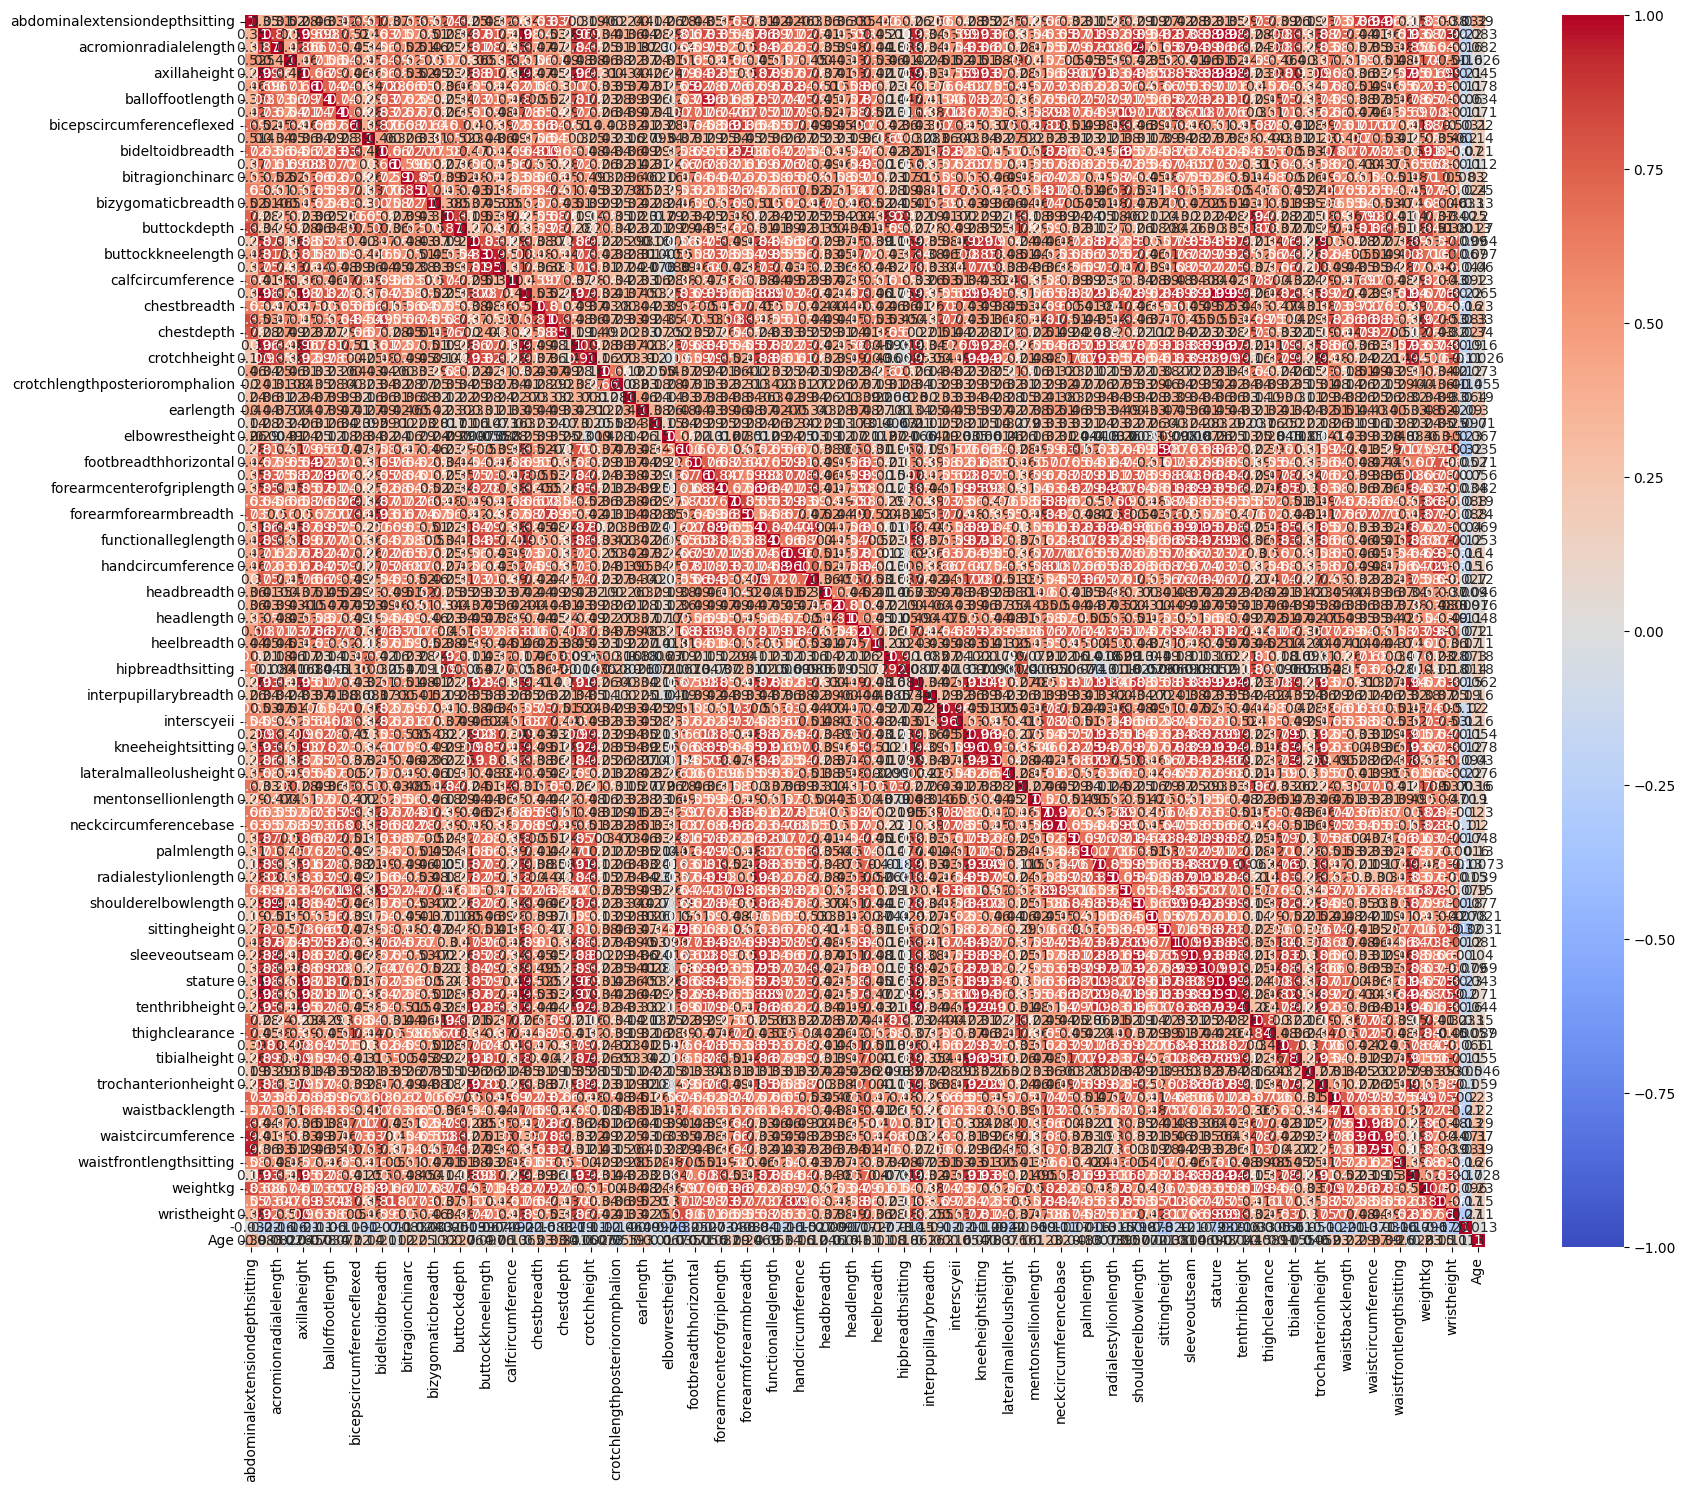

In [205]:
plt.figure(figsize=(20,16))
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");


In [20]:
df_copy.corr(numeric_only=True)[(abs(df_copy.corr(numeric_only=True))>= 0.9) & (abs(df_copy.corr(numeric_only=True)) < 1)] .any().any()

True

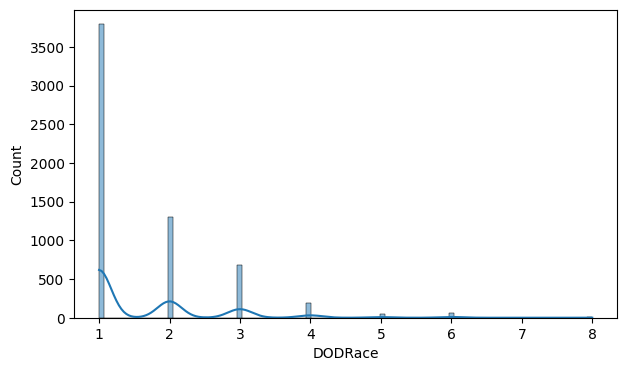

In [21]:
sns.histplot(df.DODRace, bins=100, kde=True);

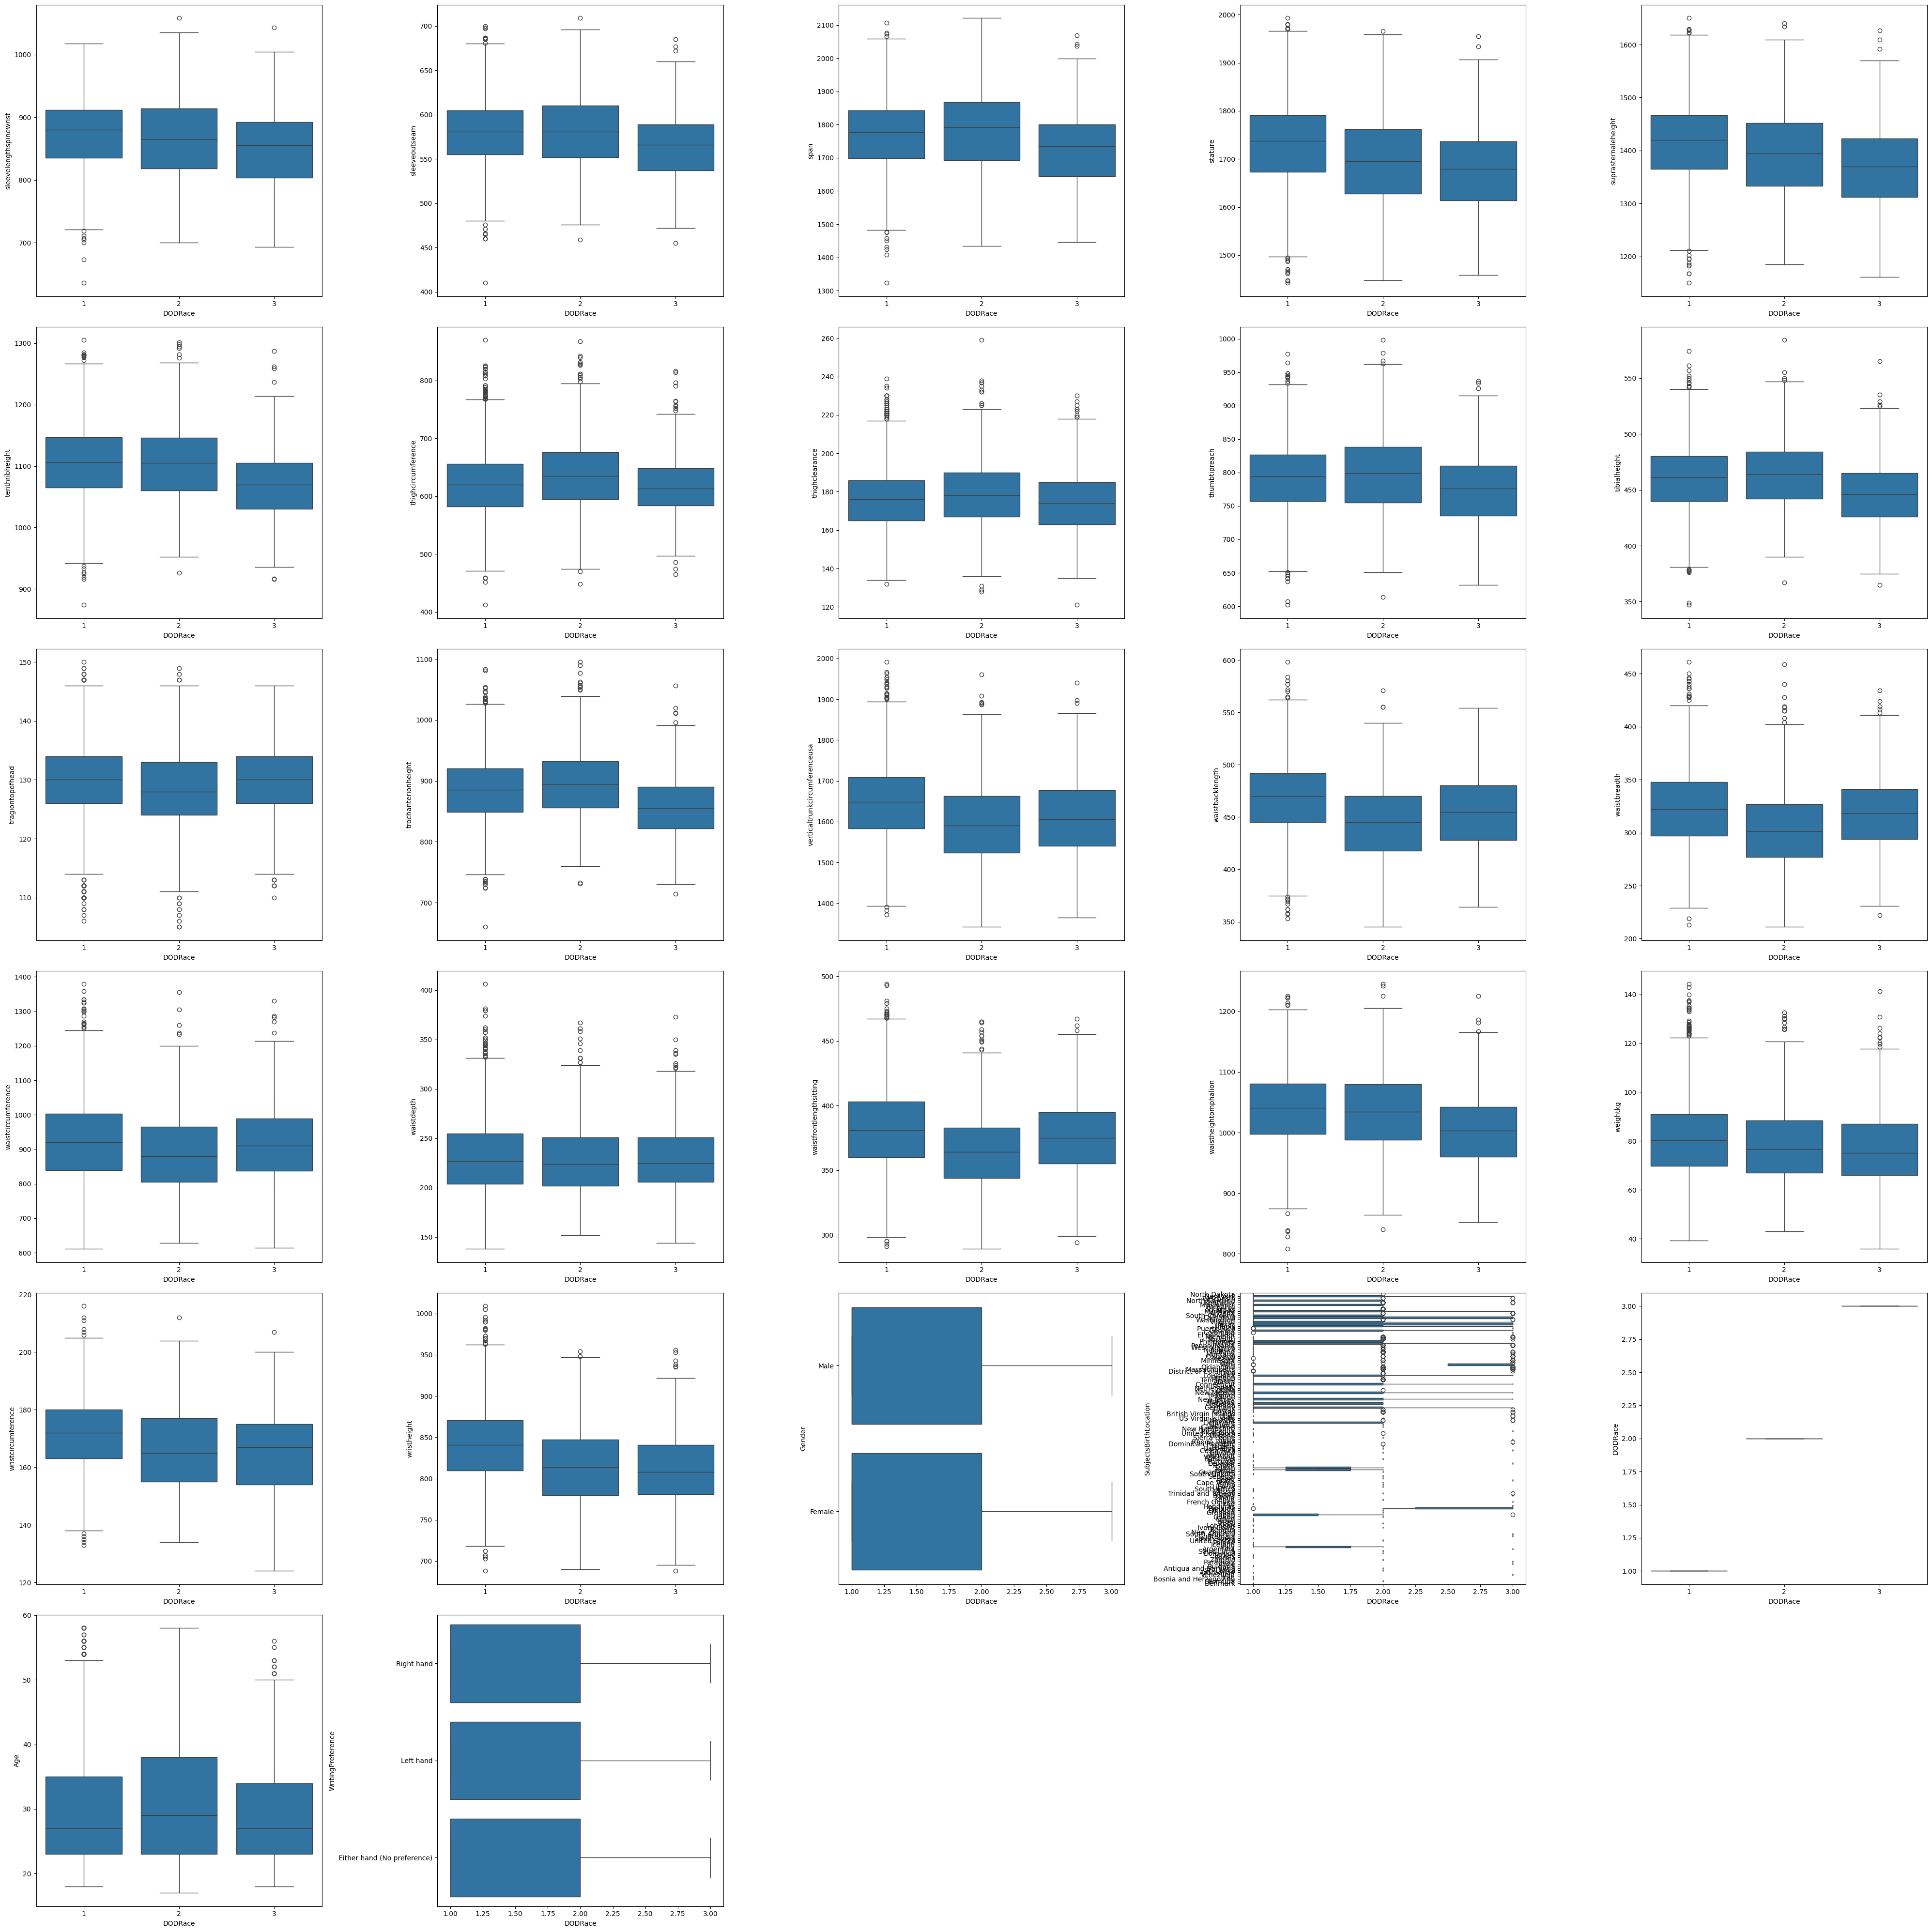

In [22]:
fig = plt.figure(figsize=(40, 40))

for i, col in enumerate(df_copy.columns[71:100]):
        plt.subplot(6, 5,i+1)
        ax = sns.boxplot(x="DODRace", y=df_copy[col], data=df_copy)
        
plt.tight_layout();


buttockheight
buttockkneelength
buttockpopliteallength
cervicaleheight
chestbreadth
chestheight
crotchheight
earlength
earprotrusion
elbowrestheight
eyeheightsitting
forearmcenterofgriplength
forearmforearmbreadth
forearmhandlength
handbreadth
handlength
headbreadth
headcircumference
headlength
heelbreadth
iliocristaleheight
interscyei
interscyeii
kneeheightmidpatella
kneeheightsitting 
lateralfemoralepicondyleheight
lateralmalleolusheight
neckcircumference
neckcircumferencebase
overheadfingertipreachsitting
palmlength
poplitealheight
radialestylionlength
shoulderelbowlength
sittingheight
sleevelengthspinewrist
sleeveoutseam
span
stature
suprasternaleheight
tenthribheight
thighcircumference
thighclearance
thumbtipreach
tibialheight  
tragiontopofhead                                  
trochanterionheight
verticaltrunkcircumferenceusa
waistbacklength
waistbreadth
waistcircumference
waistfrontlengthsitting 
waistheightomphalion
wristcircumference
wristheight
SubjectsBirthLocation
Age
Gender
                          
selected_columns = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength', 
                    'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight', '']
selected_df = df[selected_columns]

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [23]:
# Nominal category features are encoded.
cat_onehot = ['Gender', 'WritingPreference', 'SubjectsBirthLocation']

In [26]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) 

column_trans=column_trans.set_output(transform="pandas")

In [27]:
# Divide the data into train and test.
X = df_copy.drop(["DODRace"], axis = 1)
y = df_copy["DODRace"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify =y)

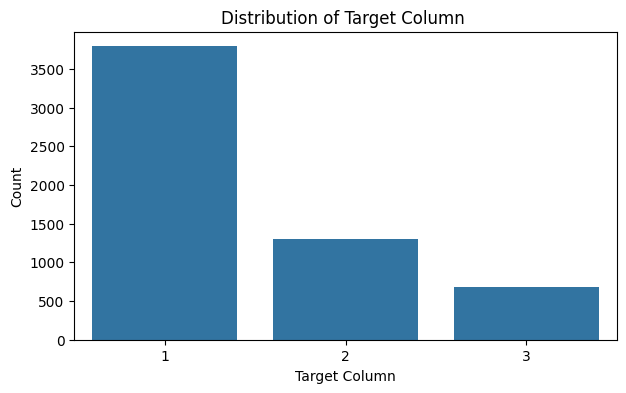

In [28]:
#illustrate the intended distribution of columns
sns.countplot(x='DODRace', data=df_copy)
plt.title('Distribution of Target Column ')
plt.xlabel('Target Column')
plt.ylabel('Count')
plt.show()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [29]:
sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [30]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [31]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[720  10  28]
 [ 18 240   2]
 [ 50   8  78]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93       758
           2       0.93      0.92      0.93       260
           3       0.72      0.57      0.64       136

    accuracy                           0.90      1154
   macro avg       0.86      0.82      0.83      1154
weighted avg       0.89      0.90      0.90      1154


Train_Set
[[2944   24   66]
 [  44  985    9]
 [ 159   18  366]]
              precision    recall  f1-score   support

           1       0.94      0.97      0.95      3034
           2       0.96      0.95      0.95      1038
           3       0.83      0.67      0.74       543

    accuracy                           0.93      4615
   macro avg       0.91      0.86      0.88      4615
weighted avg       0.93      0.93      0.93      4615



### Cross validation

In [32]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                   0.116
score_time                 0.012
test_accuracy              0.906
train_accuracy             0.932
test_precision_weighted    0.902
train_precision_weighted   0.930
test_recall_weighted       0.906
train_recall_weighted      0.932
test_f1_weighted           0.902
train_f1_weighted          0.930
dtype: float64

In [33]:
# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =[3])
precision_hispanic = make_scorer(precision_score, average=None, labels =[3])
recall_hispanic = make_scorer(recall_score,  average=None, labels =[3])


scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [34]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                   0.120
score_time                 0.012
test_f1_hispanic           0.661
train_f1_hispanic          0.750
test_precision_hispanic    0.746
train_precision_hispanic   0.835
test_recall_hispanic       0.599
train_recall_hispanic      0.680
dtype: float64

### Logistic Model GridsearchCV

In [35]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    'logistic__C': [0.50, 1.00],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__class_weight':["balanced", None]
}

grid_search = GridSearchCV(pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.5, 1.0],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [36]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='saga'))])

In [37]:
pd.DataFrame(grid_search.cv_results_).loc[grid_search.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.783
mean_train_score   0.872
Name: 9, dtype: object

In [38]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[632  20 106]
 [  8 241  11]
 [ 30   8  98]]
              precision    recall  f1-score   support

           1       0.94      0.83      0.89       758
           2       0.90      0.93      0.91       260
           3       0.46      0.72      0.56       136

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[2654   55  325]
 [  23  985   30]
 [  56   17  470]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92      3034
           2       0.93      0.95      0.94      1038
           3       0.57      0.87      0.69       543

    accuracy                           0.89      4615
   macro avg       0.82      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



# Class weight for logisticRegression Model

In [39]:
#converting the dependent variable to float
df['DODRace'] = df['DODRace'].astype(float)

In [40]:
#Try to maximize the Recall score by balance data
lr = LogisticRegression(C=10, solver='saga', class_weight='balanced')

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_balanced = Pipeline(steps=operations)

pipe_model_balanced.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='saga'))])

In [41]:
eval_metric(pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[630  21 107]
 [  9 241  10]
 [ 31   7  98]]
              precision    recall  f1-score   support

           1       0.94      0.83      0.88       758
           2       0.90      0.93      0.91       260
           3       0.46      0.72      0.56       136

    accuracy                           0.84      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[2651   57  326]
 [  22  987   29]
 [  55   15  473]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92      3034
           2       0.93      0.95      0.94      1038
           3       0.57      0.87      0.69       543

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



In [42]:
#change the class_weight to None to compere our result 
lr = LogisticRegression(C=10, solver='saga', class_weight=None)

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_None = Pipeline(steps=operations)

pipe_model_None.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [43]:
eval_metric(pipe_model_None, X_train, y_train, X_test, y_test)

Test_Set
[[720  11  27]
 [ 20 238   2]
 [ 50   7  79]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93       758
           2       0.93      0.92      0.92       260
           3       0.73      0.58      0.65       136

    accuracy                           0.90      1154
   macro avg       0.86      0.82      0.83      1154
weighted avg       0.89      0.90      0.90      1154


Train_Set
[[2943   27   64]
 [  49  975   14]
 [ 169   23  351]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3034
           2       0.95      0.94      0.95      1038
           3       0.82      0.65      0.72       543

    accuracy                           0.93      4615
   macro avg       0.90      0.85      0.87      4615
weighted avg       0.92      0.93      0.92      4615



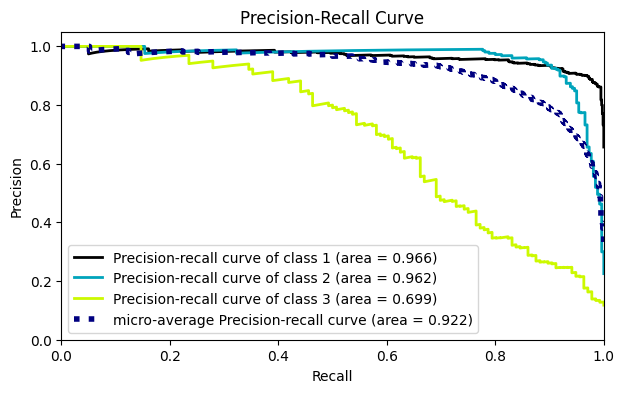

In [44]:

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("logistic", LogisticRegression(C=0.1, class_weight='balanced', solver='saga'))]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [201]:
y_pred = grid_search.predict(X_test)

Lgrid_search_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
Lgrid_search_recall = recall_score(y_test, y_pred, average=None, labels=[3])


In [191]:
from sklearn.metrics import average_precision_score

y_testdummies = pd.get_dummies(y_test).values  

average_precision_score(y_testdummies[:, 1], y_pred_proba[:, 1])


0.962082283888351

## 2. SVC


### Vanilla SVC model 

In [45]:
operations = [("encoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)
SVM_pipe_model.fit(X_train, y_train)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('SVC', SVC())])

In [46]:
eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[738  11   9]
 [ 29 229   2]
 [ 69   6  61]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.93       758
           2       0.93      0.88      0.91       260
           3       0.85      0.45      0.59       136

    accuracy                           0.89      1154
   macro avg       0.89      0.77      0.81      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[3000   14   20]
 [  77  957    4]
 [ 242   20  281]]
              precision    recall  f1-score   support

           1       0.90      0.99      0.94      3034
           2       0.97      0.92      0.94      1038
           3       0.92      0.52      0.66       543

    accuracy                           0.92      4615
   macro avg       0.93      0.81      0.85      4615
weighted avg       0.92      0.92      0.91      4615



### Cross validation SVC model 

In [47]:
scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                   0.611
score_time                 0.134
test_accuracy              0.893
train_accuracy             0.919
test_precision_weighted    0.894
train_precision_weighted   0.921
test_recall_weighted       0.893
train_recall_weighted      0.919
test_f1_weighted           0.882
train_f1_weighted          0.912
dtype: float64

In [48]:
# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =[3])
precision_hispanic = make_scorer(precision_score, average=None, labels =[3])
recall_hispanic = make_scorer(recall_score,  average=None, labels =[3])


scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [49]:

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()

fit_time                   0.588
score_time                 0.134
test_f1_hispanic           0.577
train_f1_hispanic          0.662
test_precision_hispanic    0.883
train_precision_hispanic   0.927
test_recall_hispanic       0.431
train_recall_hispanic      0.515
dtype: float64

### classweight balance SVC model 

In [50]:
operations = [("encoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[633  22 103]
 [ 16 236   8]
 [ 31   6  99]]
              precision    recall  f1-score   support

           1       0.93      0.84      0.88       758
           2       0.89      0.91      0.90       260
           3       0.47      0.73      0.57       136

    accuracy                           0.84      1154
   macro avg       0.77      0.82      0.78      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[2701   36  297]
 [  29  987   22]
 [  39    9  495]]
              precision    recall  f1-score   support

           1       0.98      0.89      0.93      3034
           2       0.96      0.95      0.95      1038
           3       0.61      0.91      0.73       543

    accuracy                           0.91      4615
   macro avg       0.85      0.92      0.87      4615
weighted avg       0.93      0.91      0.91      4615



In [51]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.608
train_f1_hispanic          0.732
test_precision_hispanic    0.512
train_precision_hispanic   0.610
test_recall_hispanic       0.752
train_recall_hispanic      0.915
dtype: float64

###  SVC Model GridsearchCV

In [52]:

param_grid = {'SVC__C': [0.50, 1.00],
               'SVC__gamma': [0.01 ,0.1],
               'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True,
                              verbose=2)

In [53]:
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5, 1.0],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': [0.01, 0.1],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=2)

In [54]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC',
                 SVC(class_weight='balanced', gamma=0.01, kernel='linear'))])

In [55]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.776
mean_train_score   0.904
Name: 9, dtype: object

In [56]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[638  24  96]
 [ 16 237   7]
 [ 37  10  89]]
              precision    recall  f1-score   support

           1       0.92      0.84      0.88       758
           2       0.87      0.91      0.89       260
           3       0.46      0.65      0.54       136

    accuracy                           0.84      1154
   macro avg       0.75      0.80      0.77      1154
weighted avg       0.86      0.84      0.84      1154


Train_Set
[[2681   45  308]
 [  19  997   22]
 [  47   11  485]]
              precision    recall  f1-score   support

           1       0.98      0.88      0.93      3034
           2       0.95      0.96      0.95      1038
           3       0.60      0.89      0.71       543

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg       0.92      0.90      0.91      4615



In [57]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model_grid, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits


test_f1_hispanic           0.616
train_f1_hispanic          0.726
test_precision_hispanic    0.516
train_precision_hispanic   0.607
test_recall_hispanic       0.768
train_recall_hispanic      0.902
dtype: float64

Fitting 10 folds for each of 16 candidates, totalling 160 fits


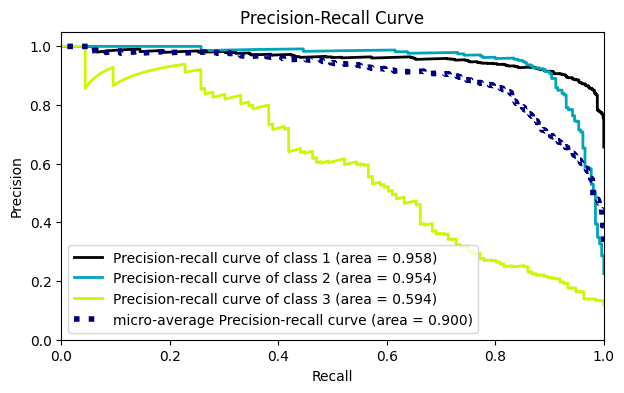

In [58]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

SVM_pipe_model_grid.fit(X_train, y_train)

decision_function = SVM_pipe_model_grid.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [202]:
y_pred = SVM_pipe_model_grid.predict(X_test)

SVM_model_grid_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
SVM_model_grid_recall = recall_score(y_test, y_pred, average=None, labels=[3])

In [192]:
average_precision_score(y_testdummies[:, 1], decision_function[:, 1])

0.9535579783318318

## 3. RF


### Vanilla RF Model

In [60]:


column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) 

column_trans=column_trans.set_output(transform="pandas")

In [61]:

operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))] 

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [62]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[733  21   4]
 [ 62 196   2]
 [112  15   9]]
              precision    recall  f1-score   support

           1       0.81      0.97      0.88       758
           2       0.84      0.75      0.80       260
           3       0.60      0.07      0.12       136

    accuracy                           0.81      1154
   macro avg       0.75      0.60      0.60      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Classweight balance RF Model

In [63]:

operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [64]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[744   9   5]
 [ 78 181   1]
 [123  10   3]]
              precision    recall  f1-score   support

           1       0.79      0.98      0.87       758
           2       0.91      0.70      0.79       260
           3       0.33      0.02      0.04       136

    accuracy                           0.80      1154
   macro avg       0.68      0.57      0.57      1154
weighted avg       0.76      0.80      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### more parameters RF Model

In [65]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=101))])

In [66]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[386  75 297]
 [ 26 183  51]
 [ 36  19  81]]
              precision    recall  f1-score   support

           1       0.86      0.51      0.64       758
           2       0.66      0.70      0.68       260
           3       0.19      0.60      0.29       136

    accuracy                           0.56      1154
   macro avg       0.57      0.60      0.54      1154
weighted avg       0.74      0.56      0.61      1154


Train_Set
[[1699  279 1056]
 [ 104  786  148]
 [ 139   49  355]]
              precision    recall  f1-score   support

           1       0.87      0.56      0.68      3034
           2       0.71      0.76      0.73      1038
           3       0.23      0.65      0.34       543

    accuracy                           0.62      4615
   macro avg       0.60      0.66      0.58      4615
weighted avg       0.76      0.62      0.65      4615



### RF Model GridsearchCV

In [206]:
# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =[3])
precision_hispanic = make_scorer(precision_score, average=None, labels =[3])
recall_hispanic = make_scorer(recall_score,  average=None, labels =[3])
 

scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [207]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.115
train_f1_hispanic          1.000
test_precision_hispanic    0.799
train_precision_hispanic   1.000
test_recall_hispanic       0.063
train_recall_hispanic      1.000
dtype: float64

In [69]:
 
param_grid = {'RF_model__n_estimators':[50, 100],
             'RF_model__max_features':[2,4],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.5, 1]
             }

In [70]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [71]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4],
                         'RF_model__max_samples': [0.5, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 100]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [72]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.5,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [73]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[352  61 345]
 [ 35 137  88]
 [ 38  20  78]]
              precision    recall  f1-score   support

           1       0.83      0.46      0.60       758
           2       0.63      0.53      0.57       260
           3       0.15      0.57      0.24       136

    accuracy                           0.49      1154
   macro avg       0.54      0.52      0.47      1154
weighted avg       0.70      0.49      0.55      1154


Train_Set
[[1622  238 1174]
 [ 142  612  284]
 [ 147   32  364]]
              precision    recall  f1-score   support

           1       0.85      0.53      0.66      3034
           2       0.69      0.59      0.64      1038
           3       0.20      0.67      0.31       543

    accuracy                           0.56      4615
   macro avg       0.58      0.60      0.53      4615
weighted avg       0.74      0.56      0.61      4615



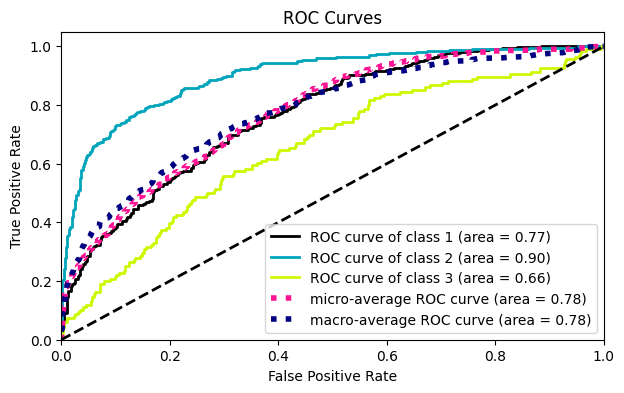

In [74]:

y_pred_probe = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe)
plt.show();


In [203]:
y_pred = rf_grid_model.predict(X_test)

rf_grid_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
rf_grid_recall = recall_score(y_test, y_pred, average=None, labels=[3])

In [193]:
average_precision_score(y_testdummies[:, 1], y_pred_probe[:, 1])

0.7648487198641385

## Comparing Models

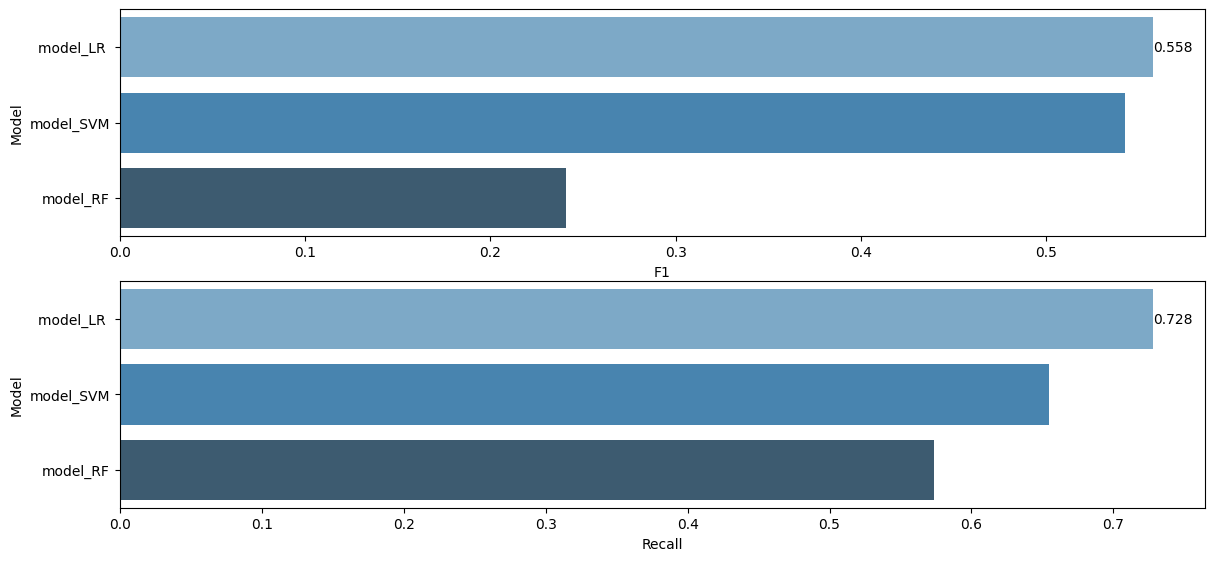

In [204]:
compare = pd.DataFrame(
    {
        "Model": ["model_LR ", "model_SVM", "model_RF"],
        "F1": [Lgrid_search_f1[0], SVM_model_grid_f1[0], rf_grid_f1[0]],
        "Recall": [Lgrid_search_recall[0], SVM_model_grid_recall[0], rf_grid_recall[0]],
        
    }
)

plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show();


# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [75]:
!pip install imblearn

In [137]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) 

column_trans=column_trans.set_output(transform="pandas")

In [138]:
X_train_som = column_trans.fit_transform(X_train)

In [141]:
X_train_smo.shape

(9102, 230)

In [140]:
smo = SMOTE()
X_train_smo, y_train_smo = smo.fit_resample(X_train_som, y_train)


In [142]:
y_train_smo.value_counts()

DODRace
1    3034
2    3034
3    3034
Name: count, dtype: int64

In [144]:
X_train_unsample.shape

(1629, 230)

In [143]:
unsample = RandomUnderSampler()
X_train_unsample, y_train_unsample = unsample.fit_resample(X_train_som, y_train)

In [146]:
y_train_unsample.value_counts()

DODRace
1    543
2    543
3    543
Name: count, dtype: int64

In [156]:
oversample = SMOTE(sampling_strategy={3: 1000})
undersample = RandomUnderSampler(sampling_strategy={1: 2500})

In [157]:
y_train.value_counts()

DODRace
1    3034
2    1038
3     543
Name: count, dtype: int64

In [158]:
_resampled_over, y_resampled_over = oversample.fit_resample(X_train_som, y_train)

In [159]:
y_resampled_over.value_counts()


DODRace
1    3034
2    1038
3    1000
Name: count, dtype: int64

In [160]:
X_resampled_under, y_resampled_under = undersample.fit_resample(X_train_som, y_train)

In [161]:
y_resampled_under.value_counts()


DODRace
1    2500
2    1038
3     543
Name: count, dtype: int64

In [171]:
# our resample pip
steps = [("o", oversample), ("u", undersample)]


pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_som, y_train)

In [172]:
y_resampled.value_counts()

DODRace
1    2500
2    1038
3    1000
Name: count, dtype: int64

In [173]:
y_train.value_counts()

DODRace
1    3034
2    1038
3     543
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

In [174]:

column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
   remainder='passthrough',verbose_feature_names_out=False) 

In [175]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", oversample),
    ("u", undersample),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]

In [176]:
smote_pipeline = imbpipeline(steps=operations)

In [177]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('o', SMOTE(sampling_strategy={3: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [178]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[684  10  64]
 [ 19 233   8]
 [ 52  10  74]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90       758
           2       0.92      0.90      0.91       260
           3       0.51      0.54      0.52       136

    accuracy                           0.86      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.86      0.86      0.86      1154


Train_Set
[[2809   36  189]
 [  50  959   29]
 [ 134   32  377]]
              precision    recall  f1-score   support

           1       0.94      0.93      0.93      3034
           2       0.93      0.92      0.93      1038
           3       0.63      0.69      0.66       543

    accuracy                           0.90      4615
   macro avg       0.84      0.85      0.84      4615
weighted avg       0.90      0.90      0.90      4615



## Other Evaluation Metrics for Multiclass Classification


- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [131]:
y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)


0.7330267250084092

In [132]:

cohen_kappa_score(y_test, y_pred)

0.7290375903599371

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [92]:
pd.set_option('display.max_columns', None)

In [180]:
# df_copy

In [117]:

sc = StandardScaler()

lr = LogisticRegression()

column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
   remainder='passthrough',verbose_feature_names_out=False) 

operations_final = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

final_model = Pipeline(steps=operations_final)

final_model.fit(X_train, y_train)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [118]:
#we will make prediction on male soldier
X_train[X_train.Gender == "Male"].describe()


abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        3131.000        3131.000               3131.000   
mean                          255.647        1443.040                335.819   
std                            36.835          62.181                 17.221   
min                           163.000        1194.000                270.000   
25%                           229.000        1401.000                324.000   
50%                           252.000        1442.000                335.000   
75%                           280.000        1483.000                347.000   
max                           451.000        1683.000                393.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            3131.000      3131.000                 3131.000   
mean              229.703      1331.214                  252.101   
std                14.674        58.428                   12.914   
min               156.000      1106.000                  186.000   
25%               220.000      1292.000                  243.000   
50%               229.000      1331.000                  252.000   
75%               239.000      1368.000                  261.000   
max               293.000      1553.000                  306.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          3131.000           3131.000                   3131.000   
mean            201.229            415.809                    358.647   
std              10.282             18.954                     34.413   
min             156.000            337.000                    246.000   
25%             194.000            403.000                    335.000   
50%             201.000            415.000                    358.000   
75%             208.000            428.000                    380.000   
max             245.000            483.000                    490.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          3131.000          3131.000            3131.000   
mean            275.804           510.798              74.829   
std              17.488            32.147               4.086   
min             220.000           374.000              59.000   
25%             263.000           490.000              72.000   
50%             276.000           510.000              75.000   
75%             288.000           531.000              77.000   
max             334.000           637.000              91.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count          3131.000                   3131.000            3131.000   
mean            331.613                    315.796             142.439   
std              13.962                     16.614               6.123   
min             281.000                    264.000             120.000   
25%             322.000                    305.000             138.000   
50%             332.000                    315.000             143.000   
75%             341.000                    326.000             147.000   
max             385.000                    390.000             166.000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count              3131.000      3131.000       3131.000           3131.000   
mean               1021.732       246.606        889.447            619.146   
std                  75.718        26.269         49.126             29.749   
min                 737.000       171.000        716.000            518.000   
25%                 969.500       228.000        855.000            599.000   
50%                1018.000       246.000        887.000            618.000   
75%                1071.000       263.000        921.000            639.000   
max                1301.000       343.000       1080.000            730.000   

       buttockpopliteallength  calfcircumference  

In [119]:
avgmale = X_train[X_train.Gender == "Male"].describe(include="all").loc["mean"]
avgmale

abdominalextensiondepthsitting    255.647
acromialheight                   1443.040
acromionradialelength             335.819
anklecircumference                229.703
axillaheight                     1331.214
balloffootcircumference           252.101
balloffootlength                  201.229
biacromialbreadth                 415.809
bicepscircumferenceflexed         358.647
bicristalbreadth                  275.804
bideltoidbreadth                  510.798
bimalleolarbreadth                 74.829
bitragionchinarc                  331.613
bitragionsubmandibulararc         315.796
bizygomaticbreadth                142.439
buttockcircumference             1021.732
buttockdepth                      246.606
buttockheight                     889.447
buttockkneelength                 619.146
buttockpopliteallength            503.887
calfcircumference                 392.534
cervicaleheight                  1519.554
chestbreadth                      289.695
chestcircumference               1

In [120]:
df_copy['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

In [121]:
avgmale["Gender"] = "Male"
avgmale["SubjectsBirthLocation"] = "California"
avgmale["WritingPreference"] = "Right hand"

In [129]:
df_copy.describe(include="O")

Gender SubjectsBirthLocation WritingPreference
count    5769                  5769              5769
unique      2                   136                 3
top      Male            California        Right hand
freq     3899                   417              5088

In [208]:
pd.DataFrame(avgmale)

mean
abdominalextensiondepthsitting     255.647
acromialheight                    1443.040
acromionradialelength              335.819
anklecircumference                 229.703
axillaheight                      1331.214
balloffootcircumference            252.101
balloffootlength                   201.229
biacromialbreadth                  415.809
bicepscircumferenceflexed          358.647
bicristalbreadth                   275.804
bideltoidbreadth                   510.798
bimalleolarbreadth                  74.829
bitragionchinarc                   331.613
bitragionsubmandibulararc          315.796
bizygomaticbreadth                 142.439
buttockcircumference              1021.732
buttockdepth                       246.606
buttockheight                      889.447
buttockkneelength                  619.146
buttockpopliteallength             503.887
calfcircumference                  392.534
cervicaleheight                   1519.554
chestbreadth                       289.695
chestcircumference                1061.106
chestdepth                         254.679
chestheight                       1293.202
crotchheight                       847.481
crotchlengthomphalion              623.315
crotchlengthposterioromphalion     356.336
earbreadth                          36.116
earlength                           64.268
earprotrusion                       23.176
elbowrestheight                    244.921
eyeheightsitting                   805.340
footbreadthhorizontal              101.848
footlength                         271.601
forearmcenterofgriplength          349.541
forearmcircumferenceflexed         310.533
forearmforearmbreadth              580.802
forearmhandlength                  480.848
functionalleglength               1132.140
handbreadth                         88.363
handcircumference                  212.463
handlength                         193.473
headbreadth                        154.205
headcircumference                  574.904
headlength                         199.859
heelanklecircumference             343.976
heelbreadth                         72.479
hipbreadth                         346.399
hipbreadthsitting                  380.265
iliocristaleheight                1063.327
interpupillarybreadth              640.034
interscyei                         431.216
interscyeii                        450.356
kneeheightmidpatella               489.190
kneeheightsitting                  555.084
lateralfemoralepicondyleheight     492.429
lateralmalleolusheight              73.010
lowerthighcircumference            409.897
mentonsellionlength                122.707
neckcircumference                  397.944
neckcircumferencebase              434.858
overheadfingertipreachsitting     1428.788
palmlength                         116.572
poplitealheight                    430.495
radialestylionlength               268.299
shouldercircumference             1179.797
shoulderelbowlength                364.339
shoulderlength                     149.866
sittingheight                      919.160
sleevelengthspinewrist             897.193
sleeveoutseam                      593.971
span                              1816.218
stature                           1758.567
suprasternaleheight               1440.824
tenthribheight                    1122.366
thighcircumference                 626.710
thighclearance                     180.799
thumbtipreach                      813.246
tibialheight                       469.080
tragiontopofhead                   131.218
trochanterionheight                902.539
verticaltrunkcircumferenceusa     1667.628
waistbacklength                    478.466
waistbreadth                       327.395
waistcircumference                 943.657
waistdepth                         238.748
waistfrontlengthsitting            388.547
waistheightomphalion              1058.086
weightkg                            85.933
wristcircumference                 176.151
wristheight                        848.

In [210]:
# final_model.predict(pd.DataFrame(avgmale))

### Conclusion for the 4 models
Finally, after developing four models and analyzing them, we concluded that the best model in terms of validation and the final results is the logistic regression model.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___